In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#display the number of samples in each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
#check null values
#we do not have null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

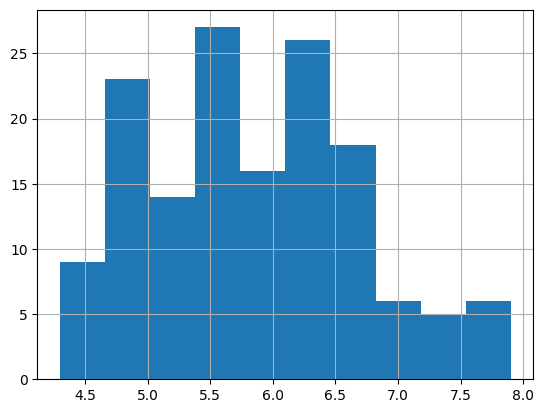

In [8]:
df['SepalLengthCm'].hist()

<Axes: >

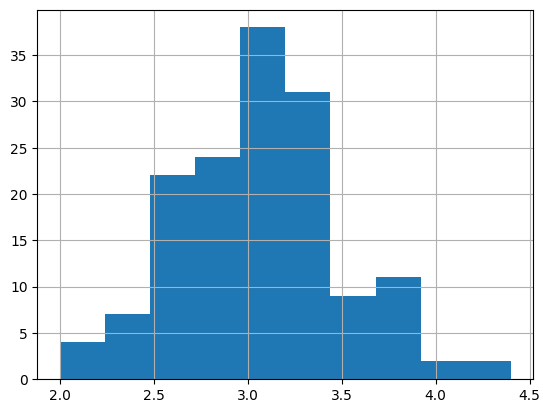

In [9]:
df['SepalWidthCm'].hist()

<Axes: >

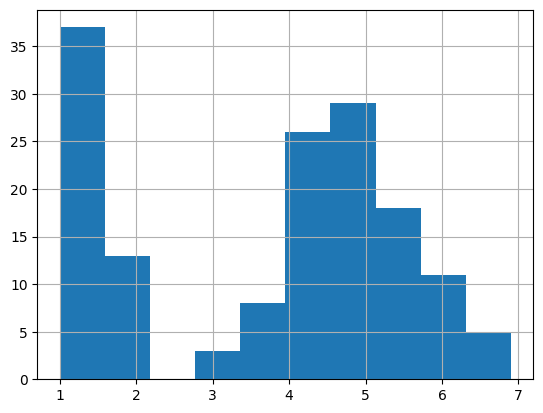

In [10]:
df['PetalLengthCm'].hist()

<Axes: >

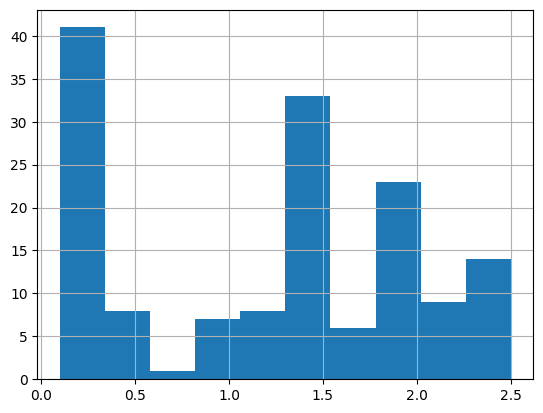

In [11]:
df['PetalWidthCm'].hist()

In [12]:
#create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor','Iris-setosa'  ]

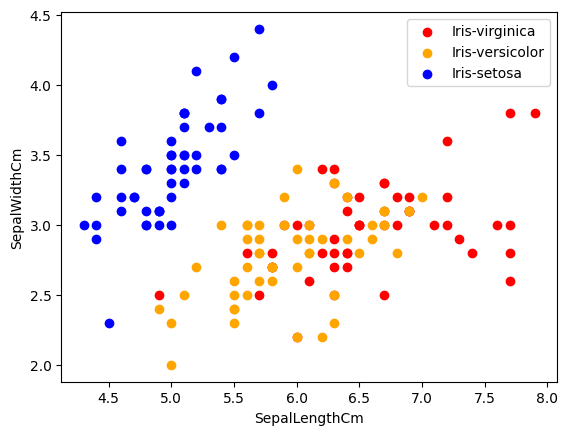

In [13]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], color = colors[i], label = species[i])

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()    

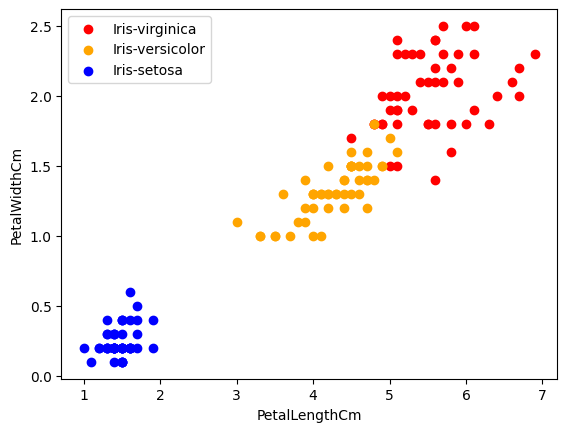

In [14]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], color = colors[i], label = species[i])

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend() 

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

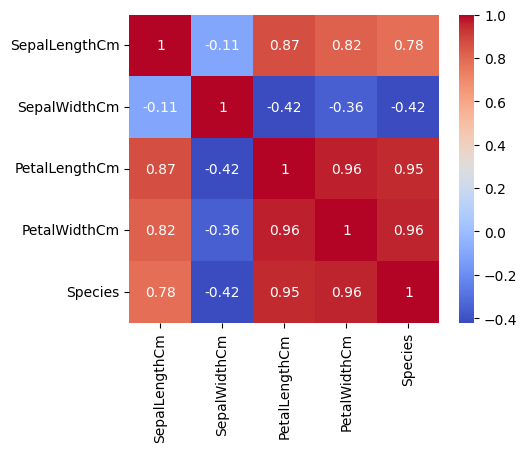

In [17]:
#display the correlation matrix
corr = df.corr()
#plot the heatmap
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

Model Traning and Testing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
#input data
X = df.drop(columns=['Species'])
#target
Y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [19]:
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


In [20]:
#model training
model.fit(X_train.values, y_train.values)

LogisticRegression()

In [21]:
#print metric to get performance
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


In [22]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train.values, y_train.values)
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


In [23]:
model.fit(X_train.values, y_train.values)

DecisionTreeClassifier()

In [24]:
#print metric to get performance
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


In [25]:
#save the model
import pickle
filename= 'saved_model.sav'        
pickle.dump(model, open('model.pkl', 'wb'))

In [27]:
filename= 'saved_model.sav'        

try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully")
except Exception as e:
    print(f"Error saving model to {e}")    

Model saved successfully


In [28]:
load_model = pickle.load(open(filename, 'rb'))

In [31]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array([1])